In [1]:
import sys
import numpy as np
import torch
from hessian_eigenthings import compute_hessian_eigenthings
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

In [2]:
sys.path.append("../../src")
from models import MLP
from data import gen_rnd_ds
from losses import LinearClassification, SquaredClassification
from block_analysis import *
from derivation import get_hessian_grad_block, block_norm, infer_layer_idx

## TODO: Need LR calibration

## Params

In [3]:
# Model
mode = "relu"
bias = False
nlayer = 3
inp_dim = 10 
out_dim = 10
hid_dim = 1000

# Data parameters
nsamp = 5000
inp_mean = 0
inp_var = 1

# Others
device = 0
lr = 1
Neigen = 50

## Squared loss

### 2 layers

In [4]:
nlayer = 2
hid_dims = [10, 100, 1000]
eigenvals, eigenvecs = {},{}

for hid_dim in hid_dims:
    model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
    ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
                   out_dim, nsamp, device)
    loss_fn = SquaredClassification(out_dim)
    eigenval, eigenvec = compute_hessian_eigenthings(model, ds,
                                                      loss_fn, Neigen)
    
    eigenvals[hid_dim]=eigenval
    eigenvecs[hid_dim]=eigenvec

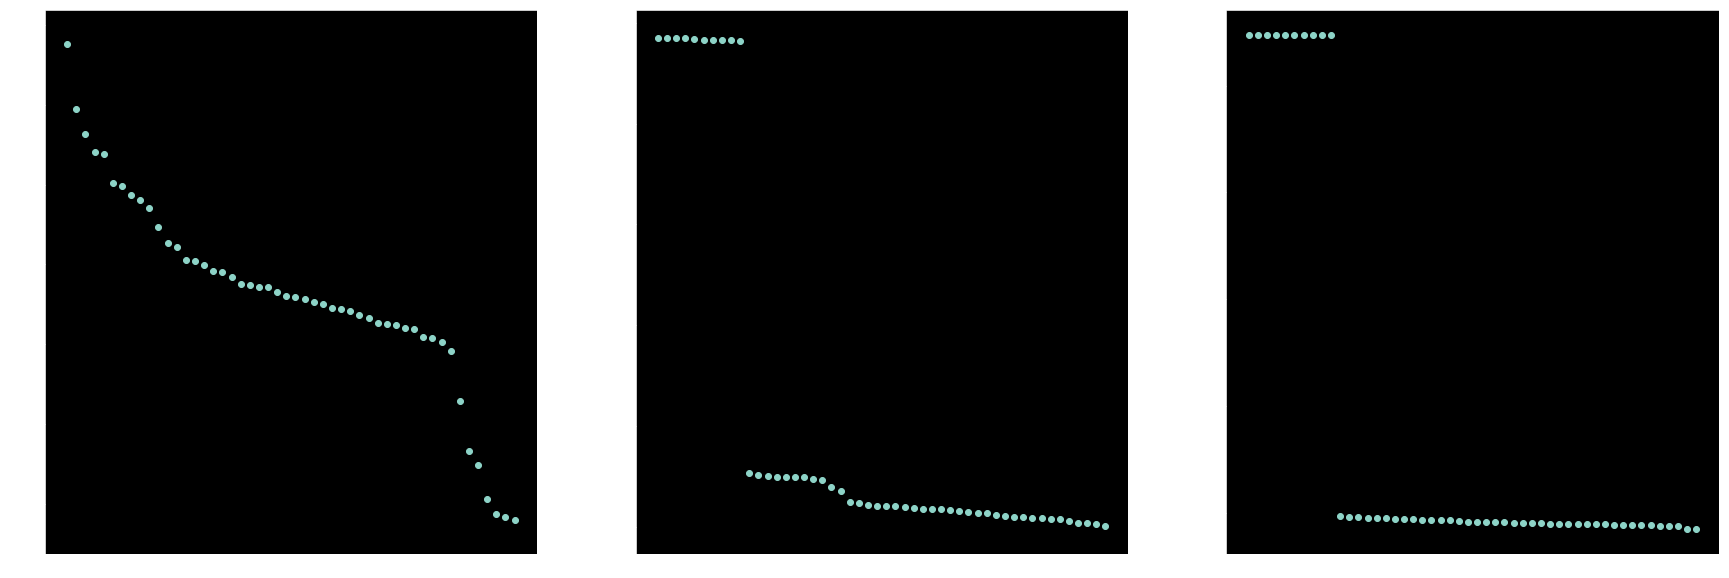

In [5]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i,hid_dim in enumerate(hid_dims):
    ax[i].scatter(torch.arange(Neigen), eigenvals[hid_dim])

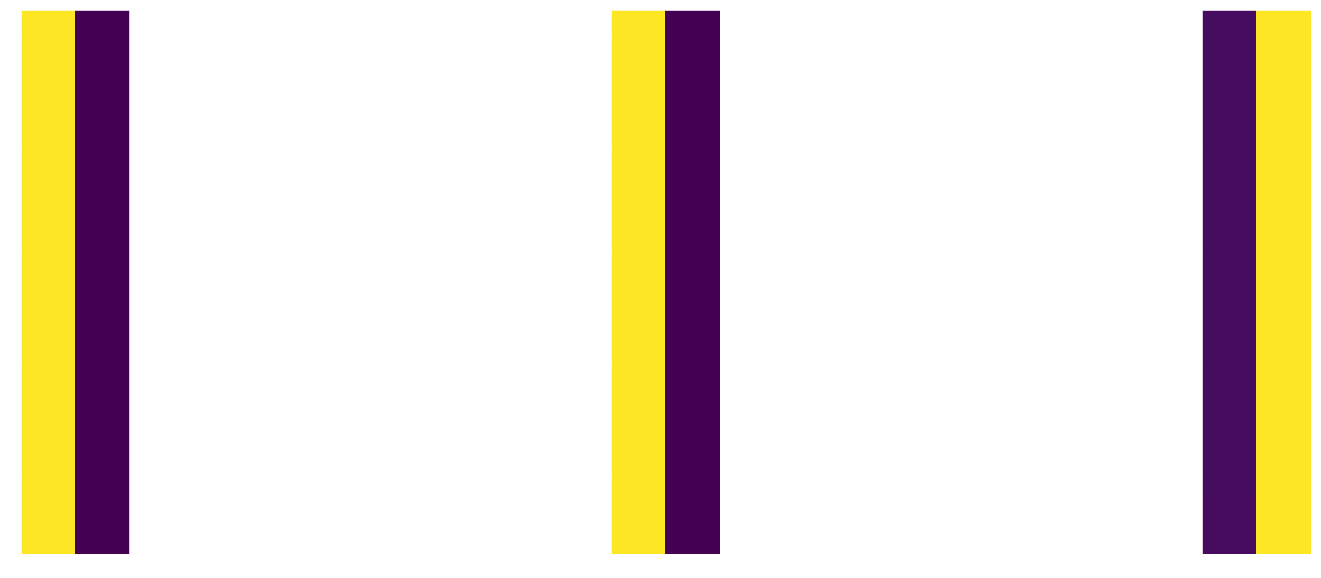

In [6]:
idx = infer_layer_idx(model.parameters())

dist = {}
for hid_dim in hid_dims:
    eigenvec = eigenvecs[hid_dim]
    dist[hid_dim] = np.concatenate([np.linalg.norm(eigenvec[:out_dim, idx[i]:idx[i+1]], axis=1)[None,:] for i in range(nlayer)])
    
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i,hid_dim in enumerate(hid_dims):
    ax[i].imshow(dist[hid_dim].T, vmin=0, vmax=1)

### 3 layers

In [7]:
nlayer = 3
hid_dims = [10, 100, 1000]
eigenvals, eigenvecs = {},{}

for hid_dim in hid_dims:
    model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
    ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
                   out_dim, nsamp, device)
    loss_fn = SquaredClassification(out_dim)
    eigenval, eigenvec = compute_hessian_eigenthings(model, ds,
                                                      loss_fn, Neigen)
    
    eigenvals[hid_dim]=eigenval
    eigenvecs[hid_dim]=eigenvec

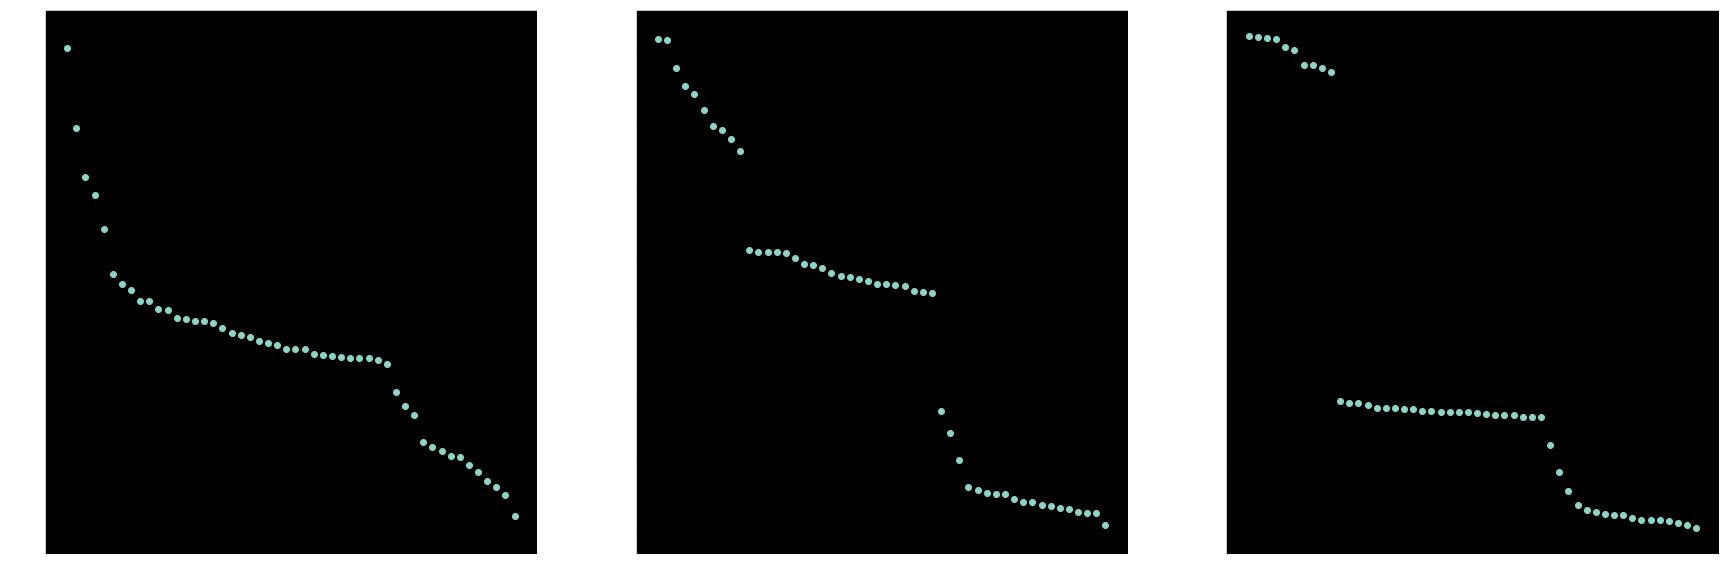

In [8]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i,hid_dim in enumerate(hid_dims):
    ax[i].scatter(torch.arange(Neigen), eigenvals[hid_dim])

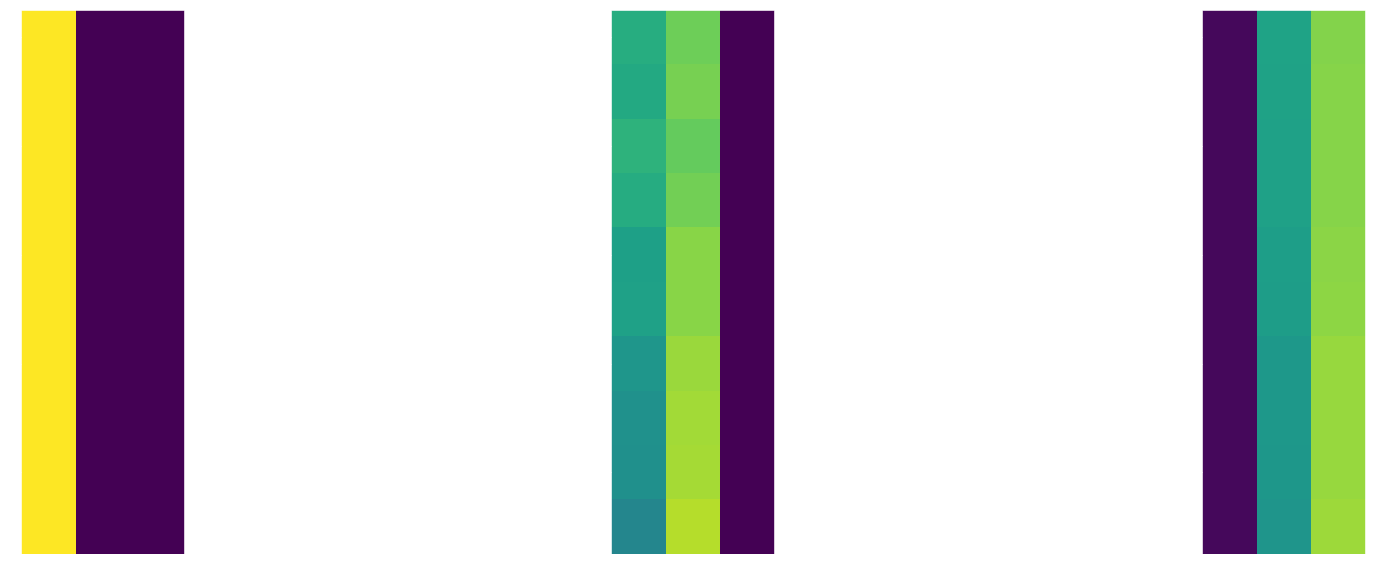

In [9]:
idx = infer_layer_idx(model.parameters())

dist = {}
for hid_dim in hid_dims:
    eigenvec = eigenvecs[hid_dim]
    dist[hid_dim] = np.concatenate([np.linalg.norm(eigenvec[:out_dim, idx[i]:idx[i+1]], axis=1)[None,:] for i in range(nlayer)])
    
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i,hid_dim in enumerate(hid_dims):
    ax[i].imshow(dist[hid_dim].T, vmin=0, vmax=1)

### 4 layers

In [10]:
nlayer = 4
hid_dims = [10, 100, 1000]
eigenvals, eigenvecs = {},{}

for hid_dim in hid_dims:
    model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
    ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
                   out_dim, nsamp, device)
    loss_fn = SquaredClassification(out_dim)
    eigenval, eigenvec = compute_hessian_eigenthings(model, ds,
                                                      loss_fn, Neigen)
    
    eigenvals[hid_dim]=eigenval
    eigenvecs[hid_dim]=eigenvec

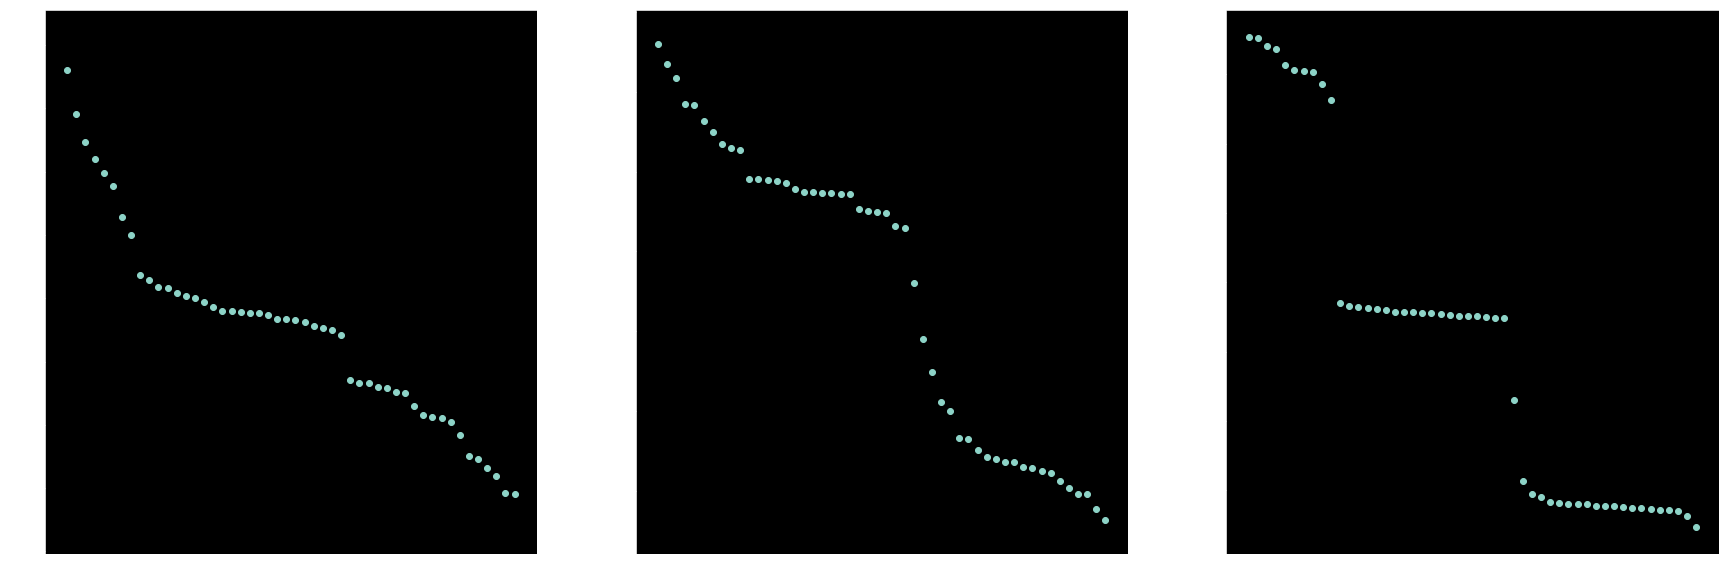

In [11]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i,hid_dim in enumerate(hid_dims):
    ax[i].scatter(torch.arange(Neigen), eigenvals[hid_dim])

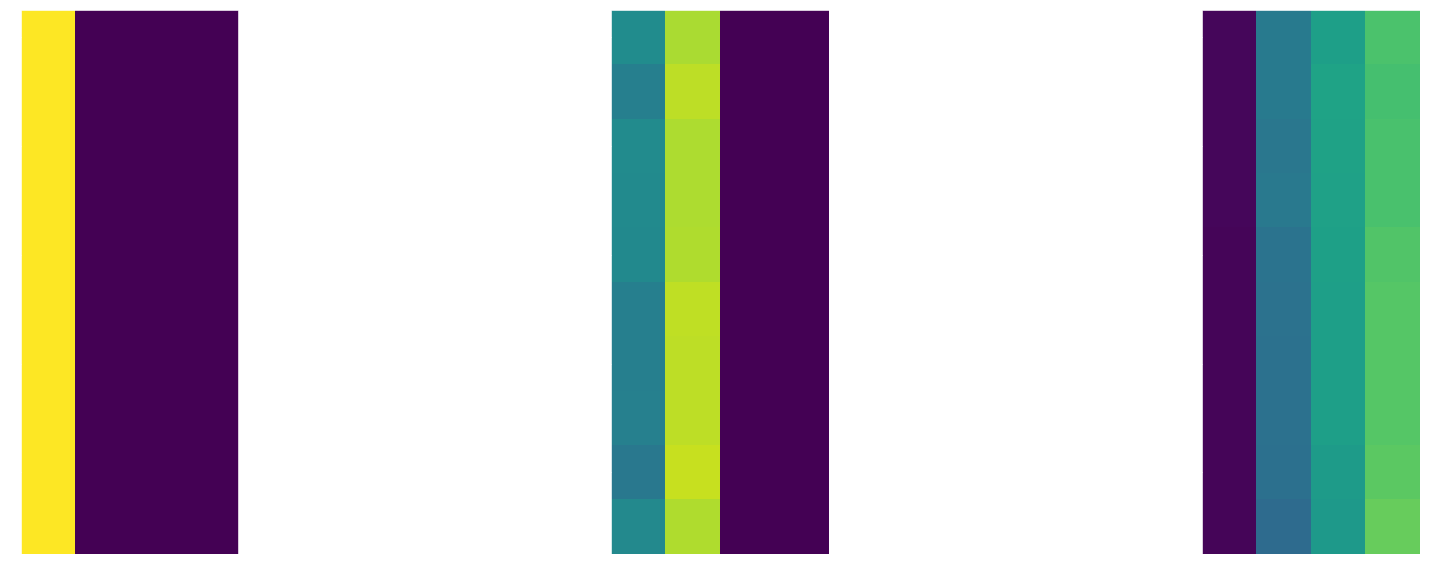

In [12]:
idx = infer_layer_idx(model.parameters())

dist = {}
for hid_dim in hid_dims:
    eigenvec = eigenvecs[hid_dim]
    dist[hid_dim] = np.concatenate([np.linalg.norm(eigenvec[:out_dim, idx[i]:idx[i+1]], axis=1)[None,:] for i in range(nlayer)])
    
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i,hid_dim in enumerate(hid_dims):
    ax[i].imshow(dist[hid_dim].T, vmin=0, vmax=1)